In [103]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [104]:
df = pd.read_csv(r"https://raw.githubusercontent.com/ritvikmath/Time-Series-Analysis/master/ice_cream_vs_heater.csv")

In [105]:
df.head()

,Month,heater,ice cream
0,2004-01,27,13
1,2004-02,18,15
2,2004-03,14,16
3,2004-04,13,19
4,2004-05,13,21


In [106]:
df.Month = df.Month.apply(lambda x : datetime.strptime(x, '%Y-%m'))
df.set_index('Month', inplace=True)

In [107]:
df = df.asfreq(pd.infer_freq(df.index))

In [108]:
heater_series = df['heater']

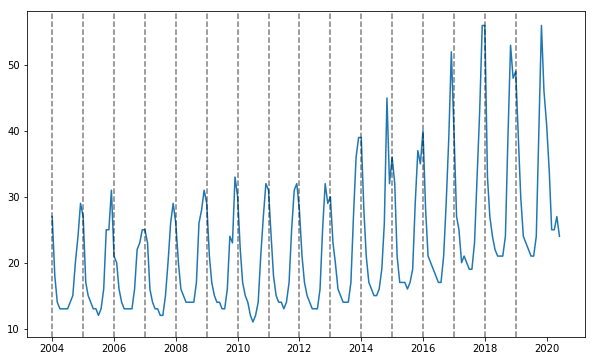

In [109]:
plt.figure(figsize=(10,6))
plt.plot(heater_series)

min_index = heater_series.index.min().year
max_index = heater_series.index.max().year

for year in range(min_index, max_index):
    plt.axvline(datetime(year, 1, 1), linestyle='--', color='k', alpha=0.5)

## We can observe that the numbers are seasonal in nature

# Normalize

In [110]:
avg, dev = heater_series.mean(), heater_series.std()

In [111]:
new_heater_series = (heater_series - avg) / dev

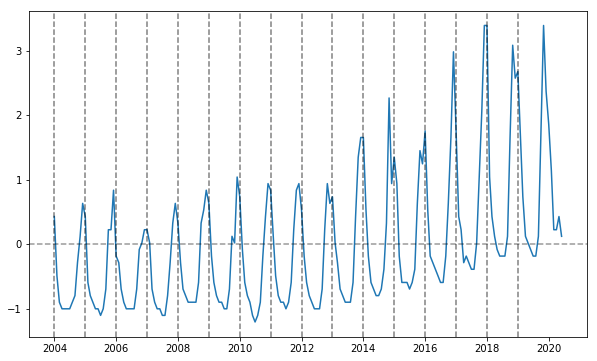

In [112]:
plt.figure(figsize=(10,6))
plt.plot(new_heater_series)

min_index = new_heater_series.index.min().year
max_index = new_heater_series.index.max().year

for year in range(min_index, max_index):
    plt.axvline(datetime(year, 1, 1), linestyle='--', color='k', alpha=0.5)

plt.axhline(0, linestyle='--', color='k', alpha=0.4)

## Remove trend

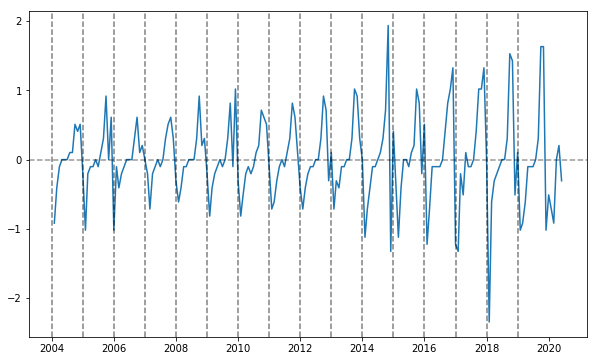

In [113]:
new_heater_series = new_heater_series.diff().dropna()

plt.figure(figsize=(10,6))
plt.plot(new_heater_series)

min_index = new_heater_series.index.min().year
max_index = new_heater_series.index.max().year

for year in range(min_index, max_index):
    plt.axvline(datetime(year, 1, 1), linestyle='--', color='k', alpha=0.5)

plt.axhline(0, linestyle='--', color='k', alpha=0.4)

## Removing Increasing Volatility

In [119]:
year_by_year_vol = new_heater_series.groupby(new_heater_series.index.year).std()

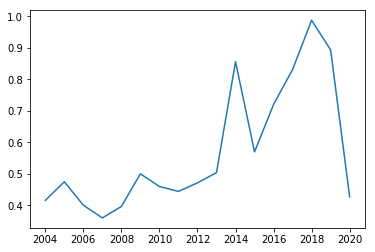

In [122]:
plt.plot(year_by_year_vol)
# high volatility in the later years
plt.show()

In [124]:
# assigning each year to it's annual vol
heater_annual_vol = new_heater_series.index.map(lambda d:year_by_year_vol.loc[d.year])

In [126]:
new_heater_series = new_heater_series / heater_annual_vol

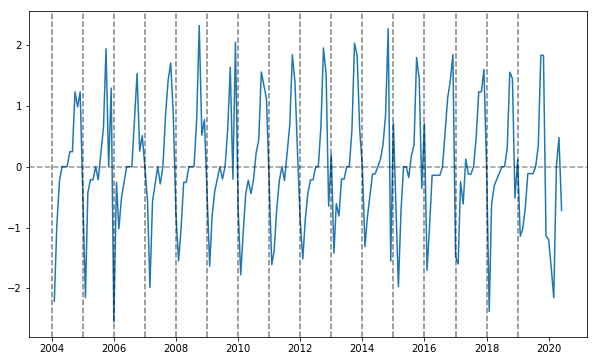

In [127]:
plt.figure(figsize=(10,6))
plt.plot(new_heater_series)

min_index = new_heater_series.index.min().year
max_index = new_heater_series.index.max().year

for year in range(min_index, max_index):
    plt.axvline(datetime(year, 1, 1), linestyle='--', color='k', alpha=0.5)

plt.axhline(0, linestyle='--', color='k', alpha=0.4)